In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Customer Segments

In [2]:
df = pd.read_csv('../data/processed/sales_data.csv', decimal=',', sep=';')

In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country     tax  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  0.4845   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  0.6441   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  0.5225   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  0.6441   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  0.6441   

   producing_cost category  
0        0.306680    WHITE  
1        0.317770    WHITE  
2        0.280438    HEART  
3        0.2

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InvoiceNo       541909 non-null  object 
 1   StockCode       541909 non-null  object 
 2   Description     540455 non-null  object 
 3   Quantity        541909 non-null  int64  
 4   InvoiceDate     541909 non-null  object 
 5   UnitPrice       541909 non-null  float64
 6   CustomerID      406829 non-null  float64
 7   Country         541909 non-null  object 
 8   tax             541909 non-null  float64
 9   producing_cost  541909 non-null  float64
 10  category        541909 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 45.5+ MB
None


In [5]:
print(df.isnull().sum())

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
tax                    0
producing_cost         0
category               0
dtype: int64


In [6]:
df['Description'] = df['Description'].fillna('Unbekannt')
df['CustomerID'] = df['CustomerID'].fillna('0000')
print(df.isnull().sum())

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
tax               0
producing_cost    0
category          0
dtype: int64


In [7]:
df = df.drop_duplicates()

In [8]:
print(df.describe())

            Quantity      UnitPrice            tax  producing_cost
count  541904.000000  541904.000000  541904.000000   541904.000000
mean        9.552327       4.611156       0.876120        0.460692
std       218.082162      96.760298      18.384457        9.538216
min    -80995.000000  -11062.060000   -2101.791400    -1434.593308
25%         1.000000       1.250000       0.237500        0.106916
50%         3.000000       2.080000       0.395200        0.205542
75%        10.000000       4.130000       0.784700        0.403564
max     80995.000000   38970.000000    7404.300000     2904.495965


In [9]:
df['Quantity'] = np.clip(df['Quantity'], df['Quantity'].quantile(0.01), df['Quantity'].quantile(0.9))
df['UnitPrice'] = np.clip(df['UnitPrice'], df['UnitPrice'].quantile(0.01), df['UnitPrice'].quantile(0.9))
df['tax'] = np.clip(df['tax'], df['tax'].quantile(0.01), df['tax'].quantile(0.9))
df['producing_cost'] = np.clip(df['producing_cost'], df['producing_cost'].quantile(0.01), df['producing_cost'].quantile(0.9))

In [10]:
print(df.describe())

            Quantity      UnitPrice            tax  producing_cost
count  541904.000000  541904.000000  541904.000000   541904.000000
mean        6.607180       2.915199       0.553888        0.279727
std         7.304953       2.311865       0.439254        0.220819
min        -2.000000       0.190000       0.036100        0.017908
25%         1.000000       1.250000       0.237500        0.106916
50%         3.000000       2.080000       0.395200        0.205542
75%        10.000000       4.130000       0.784700        0.403564
max        24.000000       7.950000       1.510500        0.734457


In [11]:
df['Quantity'] = np.clip(df['Quantity'], 0, df['Quantity'].quantile(0.99))
print(df.describe())

            Quantity      UnitPrice            tax  producing_cost
count  541904.000000  541904.000000  541904.000000   541904.000000
mean        6.638668       2.915199       0.553888        0.279727
std         7.272550       2.311865       0.439254        0.220819
min         0.000000       0.190000       0.036100        0.017908
25%         1.000000       1.250000       0.237500        0.106916
50%         3.000000       2.080000       0.395200        0.205542
75%        10.000000       4.130000       0.784700        0.403564
max        24.000000       7.950000       1.510500        0.734457


In [12]:
customer_count = df.groupby('CustomerID').size().reset_index(name='customer_count')
customer_count

,CustomerID,customer_count
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756
4371,18287.0,70


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tax,producing_cost,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0.4845,0.306680,WHITE
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.6441,0.317770,WHITE
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0.5225,0.280438,HEART
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.6441,0.222342,UNION
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0.6441,0.456974,WHITE


In [14]:
df['revenue'] = df['Quantity'] * df['UnitPrice']
df['profit'] = df['revenue'] - (df['tax'] + df['producing_cost'])
df['tax_percentage'] = np.where(df['revenue'] != 0, df['tax'] / df['revenue'], 0)
df['tax_percentage'] = df['tax_percentage'].fillna(0)  # Fehlende Werte auffüllen
df['cost_to_revenue_ratio'] = np.where(df['revenue'] != 0, df['producing_cost'] / df['revenue'],0)
df['cost_to_revenue_ratio'] = df['cost_to_revenue_ratio'].fillna(0)  # Fehlende Werte auffüllen
df['total_cost'] = df['tax'] + df['producing_cost']
df['avg_price_per_item'] = df['revenue'] / df['Quantity']
df['avg_price_per_item'] = np.where(df['Quantity'] != 0, df['revenue'] / df['Quantity'],0)
df['avg_price_per_item'] = df['avg_price_per_item'].fillna(0)  # Fehlende Werte auffüllen
df['profit_to_cost_ratio'] = np.where(df['total_cost'] != 0, df['profit'] / df['total_cost'],0)
df['profit_to_cost_ratio'] = df['profit_to_cost_ratio'].fillna(0)
df['profit_margin'] = df['profit'] / df['revenue']
df['profit_margin'] = np.where(df['revenue'] != 0, df['profit'] / df['revenue'],0)
df['profit_margin'] = df['profit_margin'].fillna(0)  # Fehlende Werte auffüllen


In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [16]:
print(df[numeric_cols].applymap(lambda x: not pd.api.types.is_number(x) or pd.isnull(x) or x == float('inf') or x == float('-inf')).sum())

C:\Users\phili\AppData\Local\Temp\ipykernel_21580\1192377767.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[numeric_cols].applymap(lambda x: not pd.api.types.is_number(x) or pd.isnull(x) or x == float('inf') or x == float('-inf')).sum())


Quantity                 0
UnitPrice                0
tax                      0
producing_cost           0
revenue                  0
profit                   0
tax_percentage           0
cost_to_revenue_ratio    0
total_cost               0
avg_price_per_item       0
profit_to_cost_ratio     0
profit_margin            0
dtype: int64


In [17]:
df[df.tax_percentage == float('inf')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,tax,producing_cost,category,revenue,profit,tax_percentage,cost_to_revenue_ratio,total_cost,avg_price_per_item,profit_to_cost_ratio,profit_margin


In [18]:
numeric_cols_scaled = [col + '_scaled' for col in numeric_cols]
scaler = StandardScaler()
df[numeric_cols_scaled] = scaler.fit_transform(df[numeric_cols])

In [19]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 541904 entries, 0 to 541908
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   InvoiceNo                     541904 non-null  object 
 1   StockCode                     541904 non-null  object 
 2   Description                   541904 non-null  object 
 3   Quantity                      541904 non-null  int64  
 4   InvoiceDate                   541904 non-null  object 
 5   UnitPrice                     541904 non-null  float64
 6   CustomerID                    541904 non-null  object 
 7   Country                       541904 non-null  object 
 8   tax                           541904 non-null  float64
 9   producing_cost                541904 non-null  float64
 10  category                      541904 non-null  object 
 11  revenue                       541904 non-null  float64
 12  profit                        541904 non-null  fl

In [20]:
print(df.describe())

            Quantity      UnitPrice            tax  producing_cost  \
count  541904.000000  541904.000000  541904.000000   541904.000000   
mean        6.638668       2.915199       0.553888        0.279727   
std         7.272550       2.311865       0.439254        0.220819   
min         0.000000       0.190000       0.036100        0.017908   
25%         1.000000       1.250000       0.237500        0.106916   
50%         3.000000       2.080000       0.395200        0.205542   
75%        10.000000       4.130000       0.784700        0.403564   
max        24.000000       7.950000       1.510500        0.734457   

             revenue         profit  tax_percentage  cost_to_revenue_ratio  \
count  541904.000000  541904.000000   541904.000000          541904.000000   
mean       13.048393      12.214778        0.081745               0.042073   
std        16.471254      16.330047        0.071898               0.039808   
min         0.000000      -2.244957        0.000000      

In [21]:
# Überblick über die Daten
print(df.info())  # Überblick über Spalten und Datentypen
print(df.describe())  # Statistische Zusammenfassung der numerischen Spalten

# Fehlende Werte prüfen
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 541904 entries, 0 to 541908
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   InvoiceNo                     541904 non-null  object 
 1   StockCode                     541904 non-null  object 
 2   Description                   541904 non-null  object 
 3   Quantity                      541904 non-null  int64  
 4   InvoiceDate                   541904 non-null  object 
 5   UnitPrice                     541904 non-null  float64
 6   CustomerID                    541904 non-null  object 
 7   Country                       541904 non-null  object 
 8   tax                           541904 non-null  float64
 9   producing_cost                541904 non-null  float64
 10  category                      541904 non-null  object 
 11  revenue                       541904 non-null  float64
 12  profit                        541904 non-null  fl

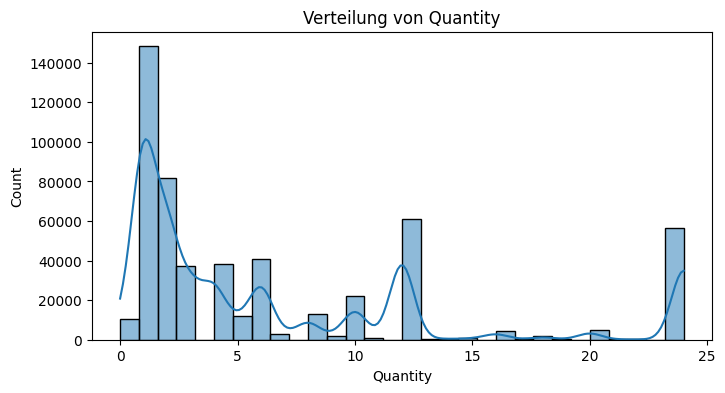

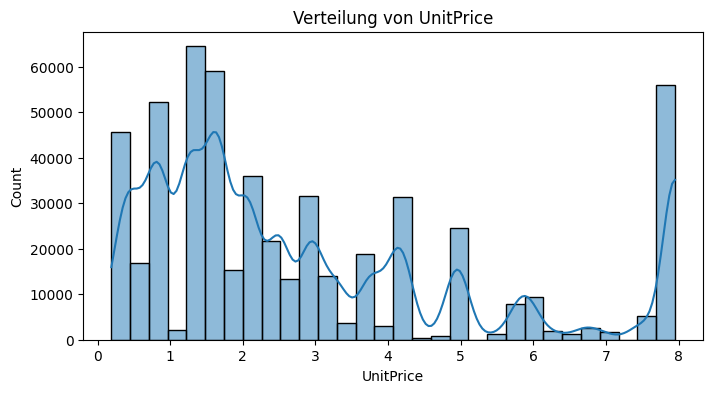

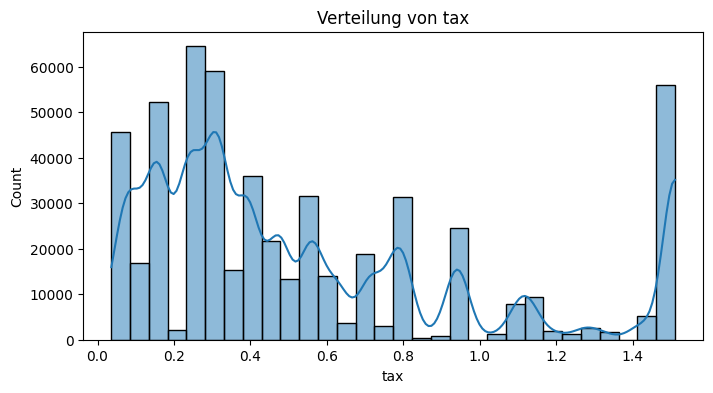

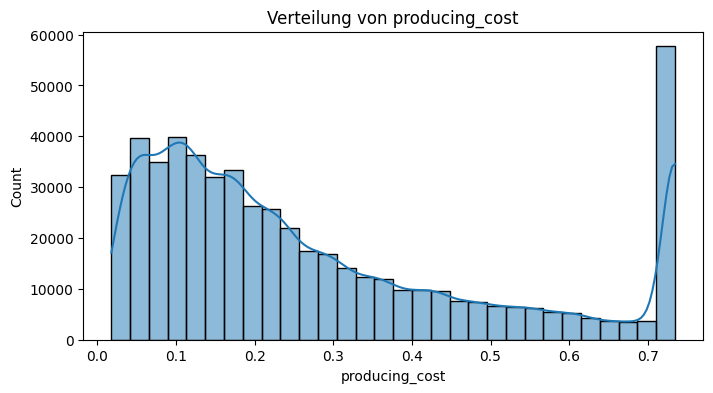

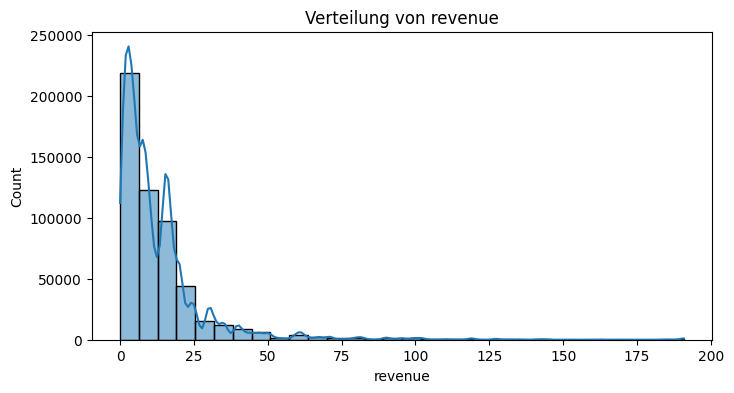

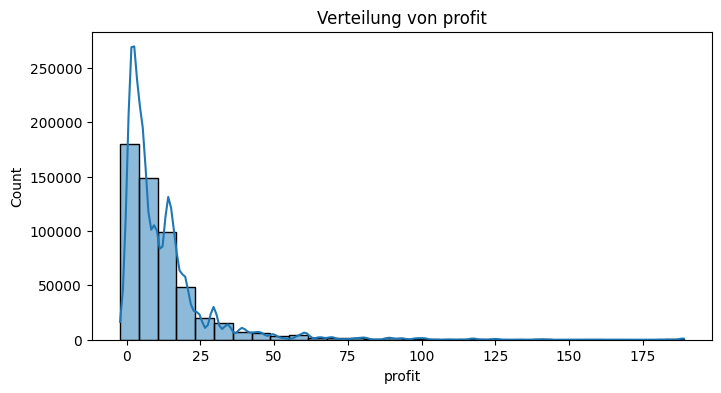

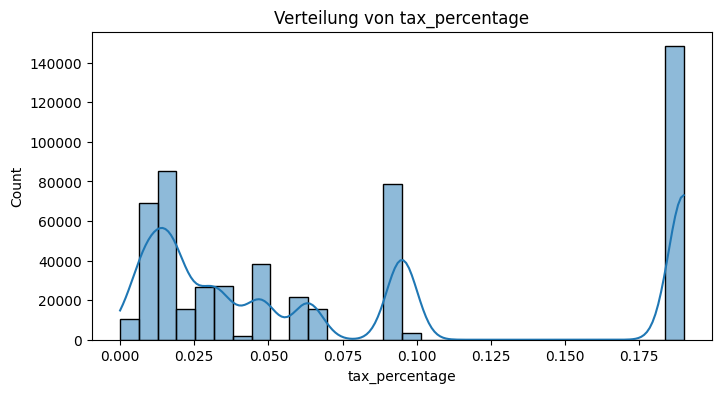

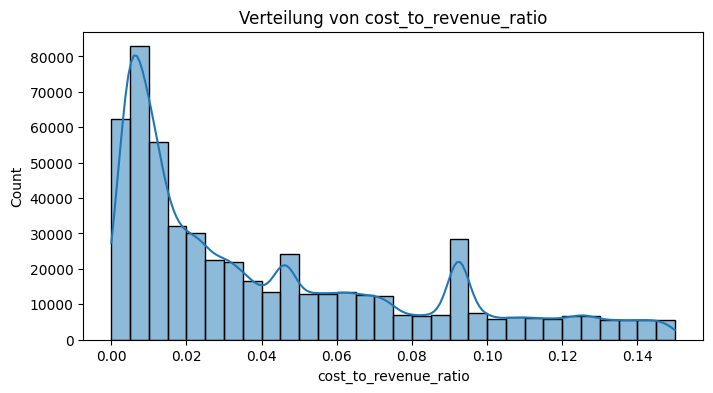

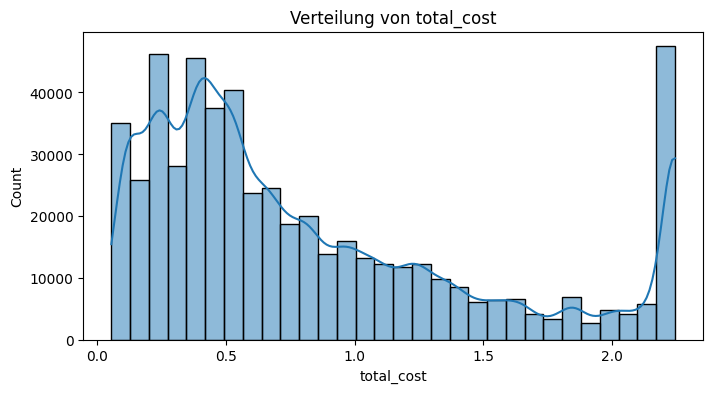

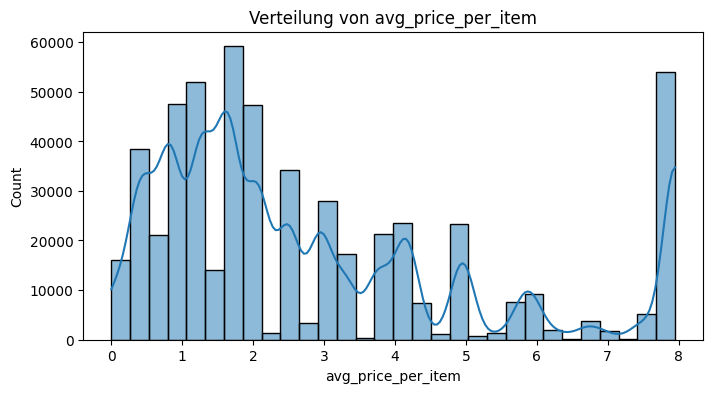

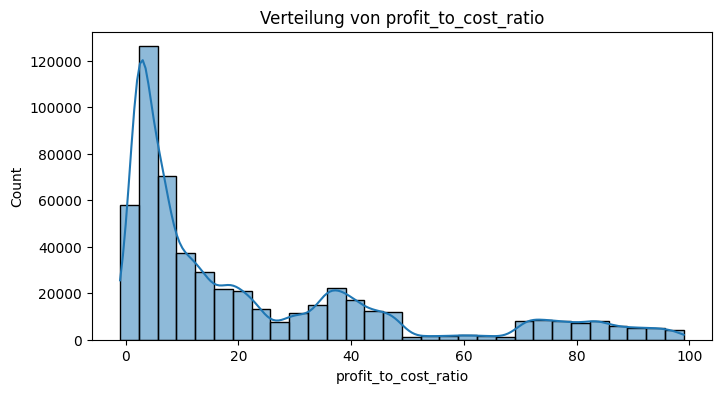

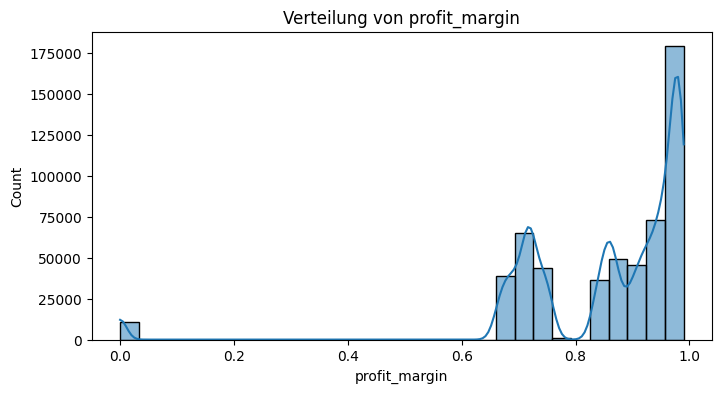

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Verteilung von {col}')
    plt.show()


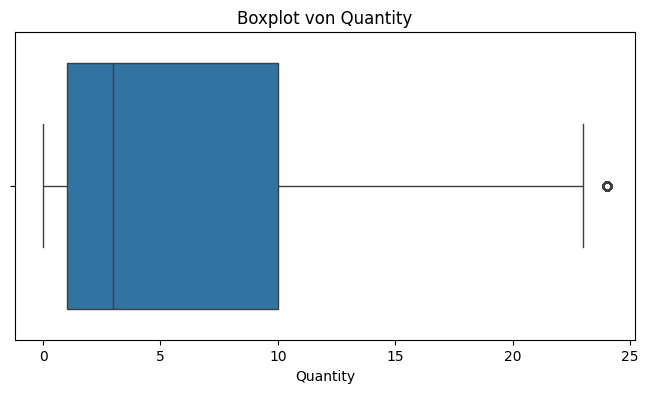

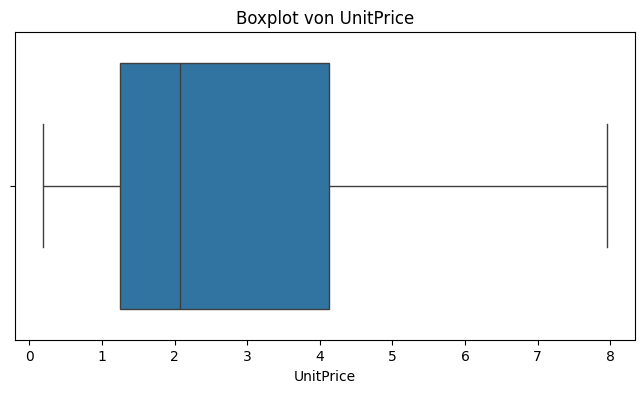

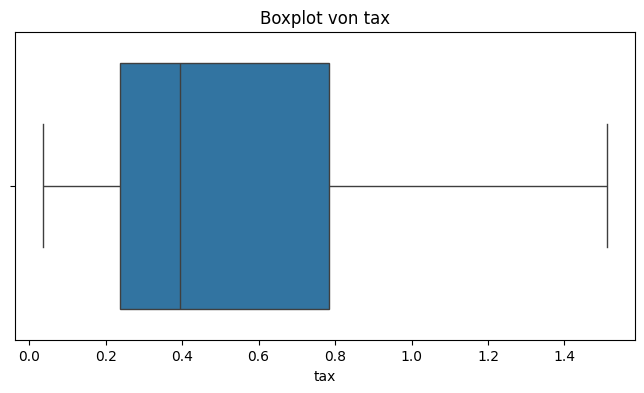

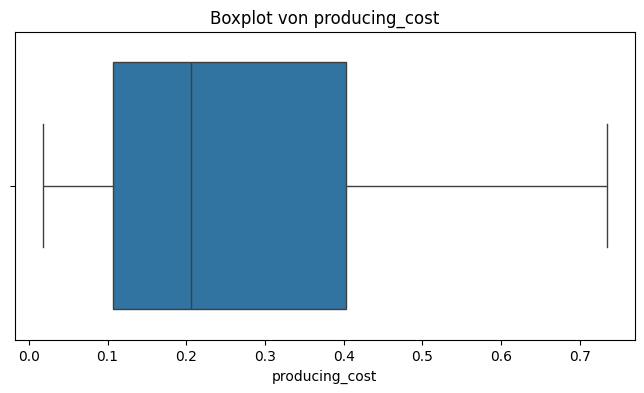

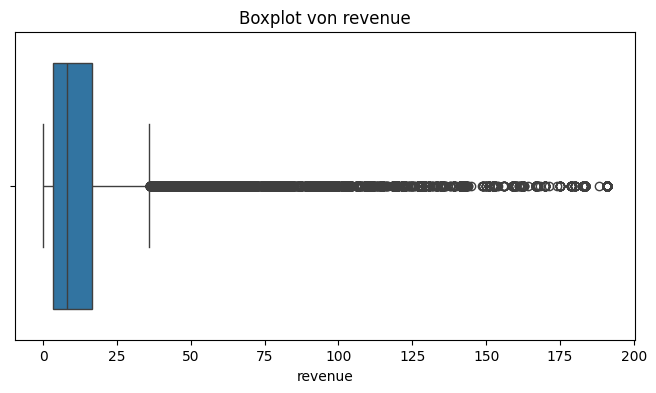

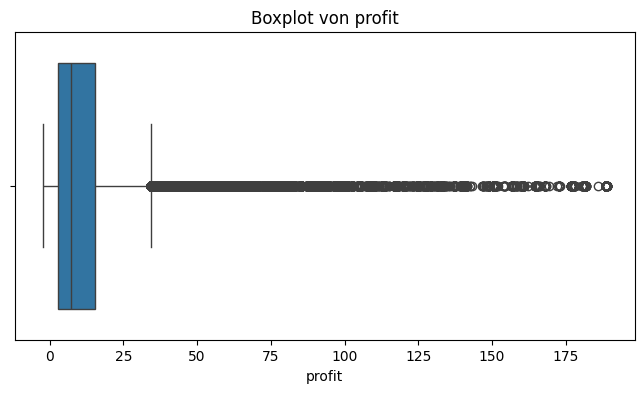

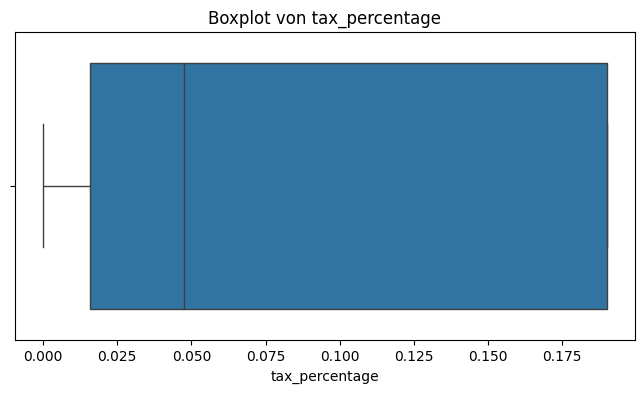

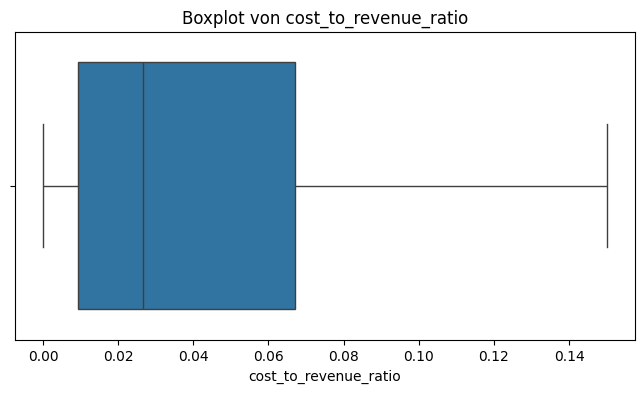

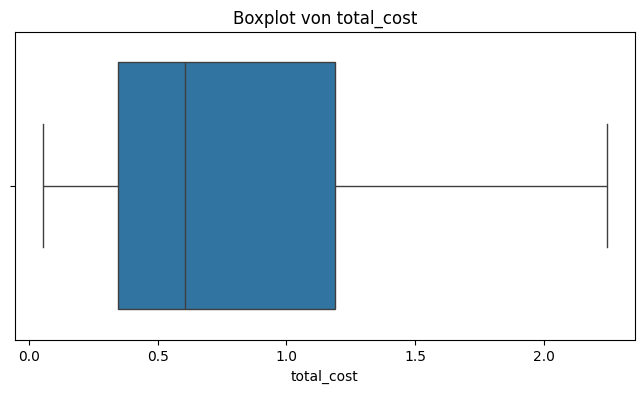

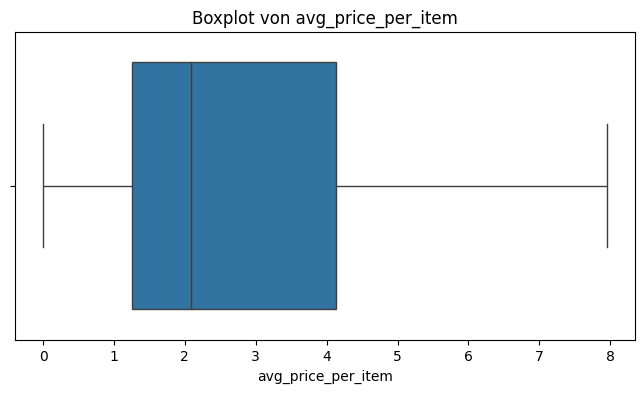

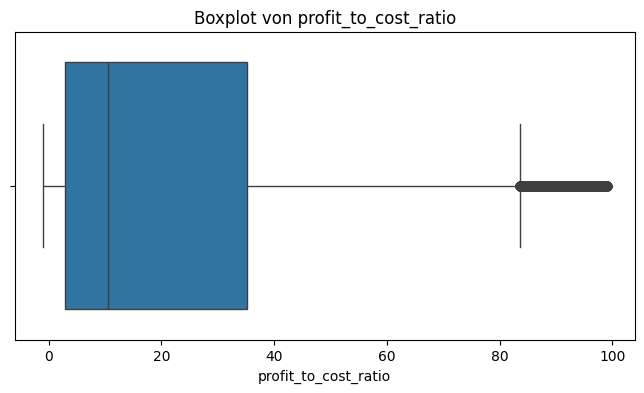

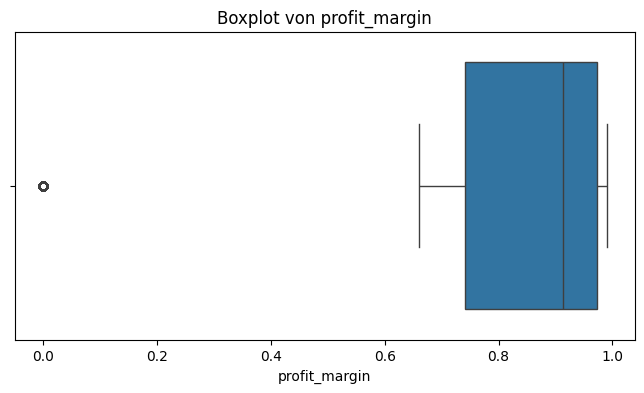

In [23]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot von {col}')
    plt.show()


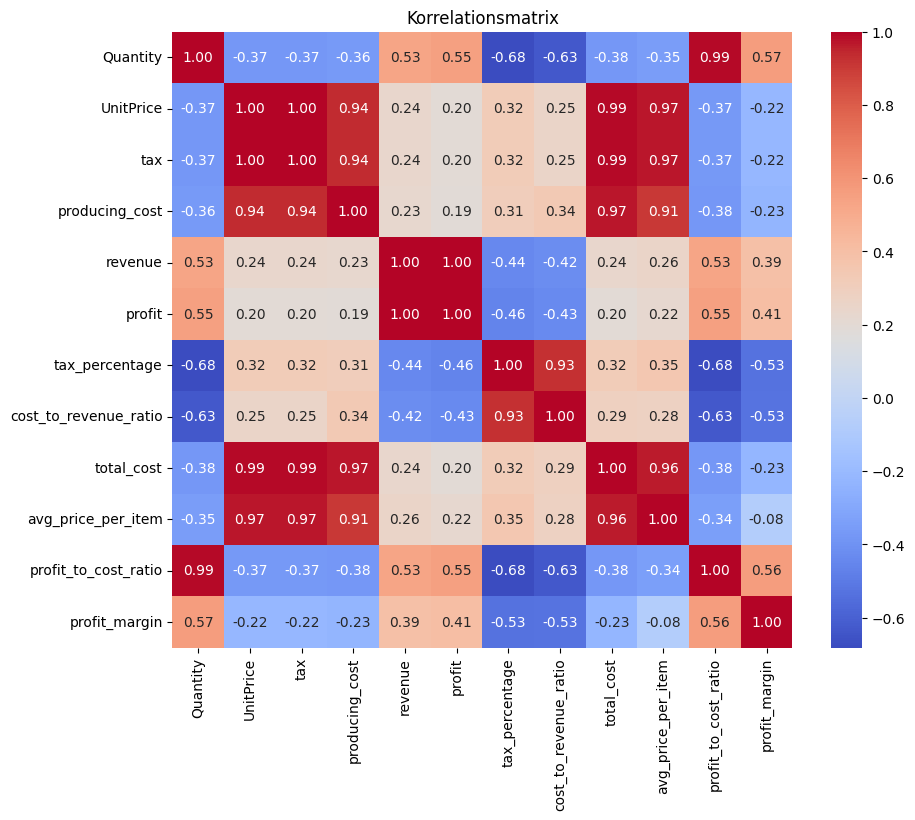

In [24]:
# Korrelationsmatrix berechnen
correlation_matrix = df[numeric_cols].corr()

# Heatmap der Korrelationen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()


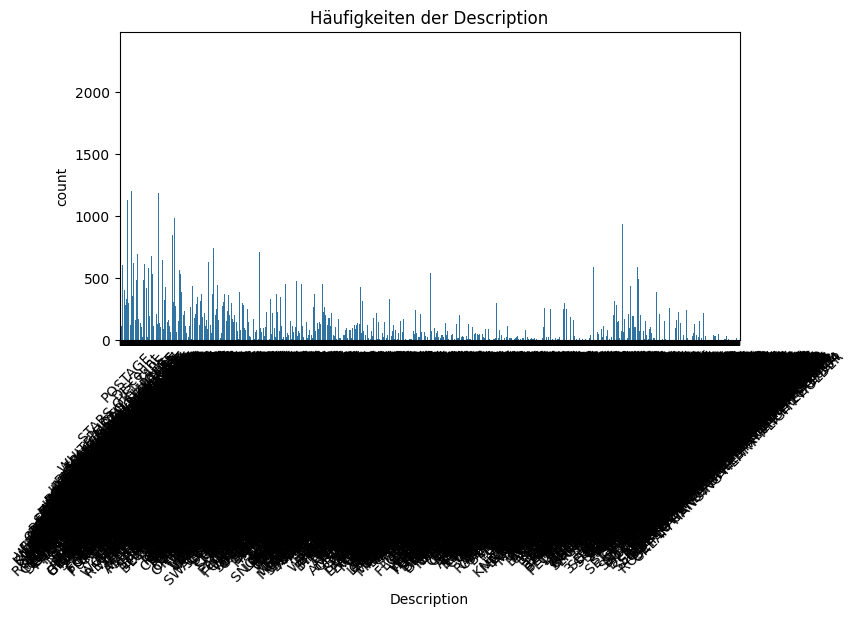

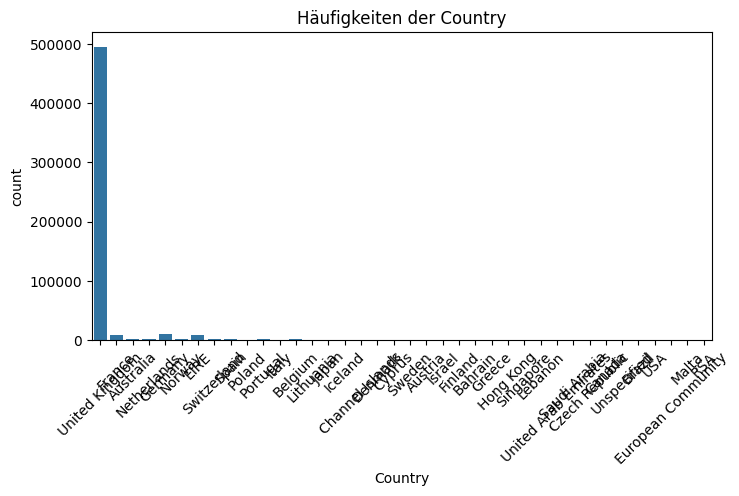

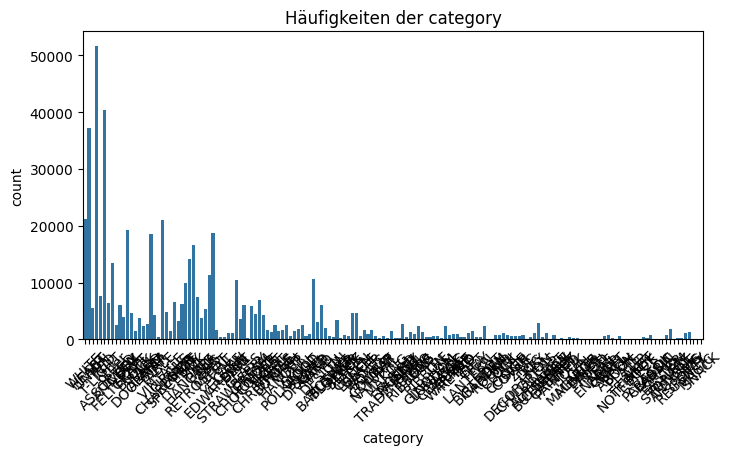

In [25]:
str_cols = ["Description", "Country", "category"]
for col in str_cols:
    # Balkendiagramm
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title('Häufigkeiten der '+ col)
    plt.xticks(rotation=45)
    plt.show()


            revenue     profit
category                      
50'S      11.318377  10.865826
ALARM     18.781152  17.490350
ALPHABET  13.290072  12.735111
AND       15.104816  14.194604
ANTIQUE   29.782292  27.607446
...             ...        ...
WOOD      13.217406  12.213264
WRAP       9.303158   9.188432
YELLOW     8.929756   7.704653
ZINC      14.325878  13.440654
other      8.285426   7.360431

[160 rows x 2 columns]


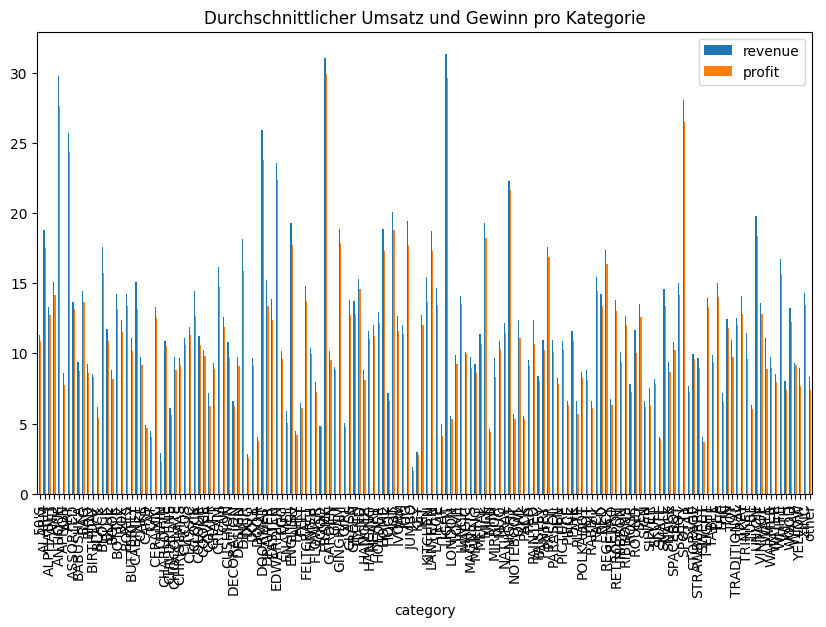

In [26]:
# Umsatz und Gewinn pro Kategorie
grouped = df.groupby('category')[['revenue', 'profit']].mean()
print(grouped)

grouped.plot(kind='bar', figsize=(10, 6), title='Durchschnittlicher Umsatz und Gewinn pro Kategorie')
plt.show()


In [27]:
# Ausreißer identifizieren
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1  # Interquartilsabstand
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Zeilen mit Ausreißern anzeigen
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Ausreißer in {col}:\n', outliers)


Ausreißer in Quantity:
        InvoiceNo StockCode                         Description  Quantity  \
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        24   
26        536370     22728           ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727           ALARM CLOCK BAKELIKE RED         24   
30        536370     21883                    STARS GIFT TAPE         24   
31        536370     10002         INFLATABLE POLITICAL GLOBE         24   
...          ...       ...                                 ...       ...   
541876    581585     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541882    581585     21916     SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692         BOX OF 24 COCKTAIL PARASOLS        24   
541891    581586     23275    SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217       RED RETROSPOT ROUND CAKE TINS        24   

                InvoiceDate  UnitPrice CustomerID         Count

In [28]:
df.InvoiceDate.max()

'2011-12-09 12:50:00'

In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
df['revenue'] = np.clip(df['revenue'], 0, df['revenue'].quantile(0.9))


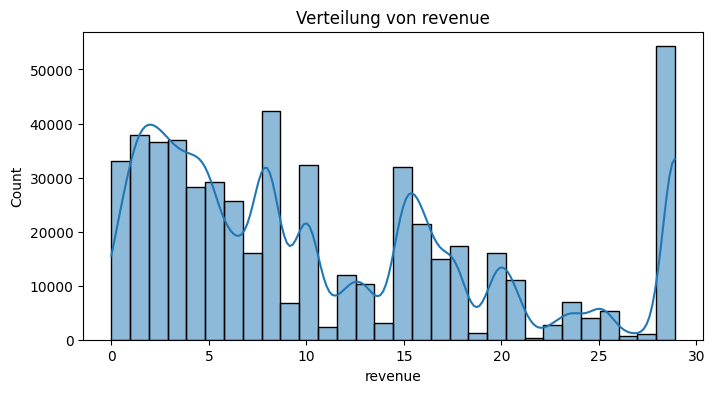

In [31]:
plt.figure(figsize=(8, 4))
sns.histplot(df["revenue"], kde=True, bins=30)
plt.title(f'Verteilung von revenue')
plt.show()


In [32]:
today = pd.Timestamp('2011-12-31')  # Ersetze durch dein tatsächliches Datum Timestamp('2011-12-09 12:50:00')


# Berechnung der RFM-Werte
rfm = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (today - x.max()).days),  # Letztes Kaufdatum
    frequency=('InvoiceDate', 'count'),                        # Kaufhäufigkeit
    monetary=('revenue', 'sum')                              # Gesamtausgaben
).reset_index()

# Ergebnisse ansehen
print(rfm.head())


  CustomerID  recency  frequency  monetary
0    12346.0      346          2     24.96
1    12347.0       23        182   3388.81
2    12348.0       96         31    481.17
3    12349.0       39         73   1265.59
4    12350.0      331         17    302.35


In [33]:
rfm['monetary'] = np.clip(rfm['monetary'], 0, rfm['monetary'].quantile(0.9))


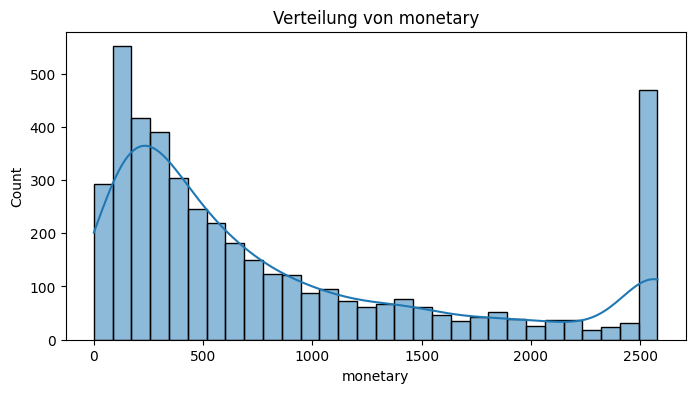

In [34]:
plt.figure(figsize=(8, 4))
sns.histplot(rfm["monetary"], kde=True, bins=30)
plt.title(f'Verteilung von monetary')
plt.show()


In [35]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

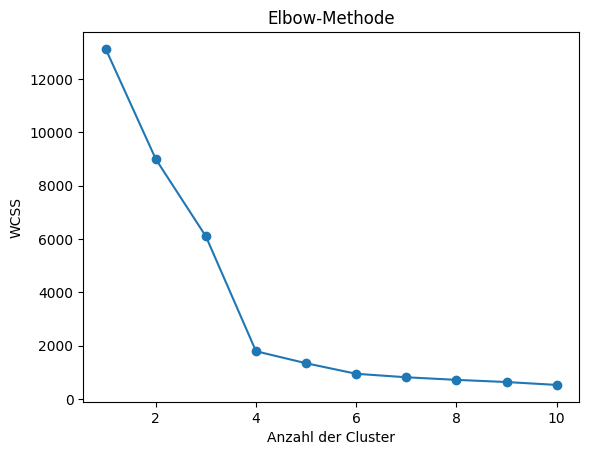

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Teste verschiedene Cluster-Anzahlen
wcss = []  # Within-Cluster-Sum-of-Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow-Diagramm plotten
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()


In [37]:
# Clusteranzahl festlegen (z. B. 4 Cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Ergebnisse ansehen
print(rfm.head())


  CustomerID  recency  frequency  monetary  cluster
0    12346.0      346          2     24.96        2
1    12347.0       23        182   2578.64        1
2    12348.0       96         31    481.17        0
3    12349.0       39         73   1265.59        0
4    12350.0      331         17    302.35        2


In [38]:
# Durchschnittswerte pro Cluster berechnen
cluster_summary = rfm.groupby('cluster').agg(
    avg_recency=('recency', 'mean'),
    avg_frequency=('frequency', 'mean'),
    avg_monetary=('monetary', 'mean'),
    customer_count=('CustomerID', 'count')
).reset_index()

print(cluster_summary)


   cluster  avg_recency  avg_frequency  avg_monetary  customer_count
0        0    69.164595      48.366052    518.773129            2333
1        1    47.586000     402.601000   2176.518110            1000
2        2   272.383654      25.447115    291.211971            1040


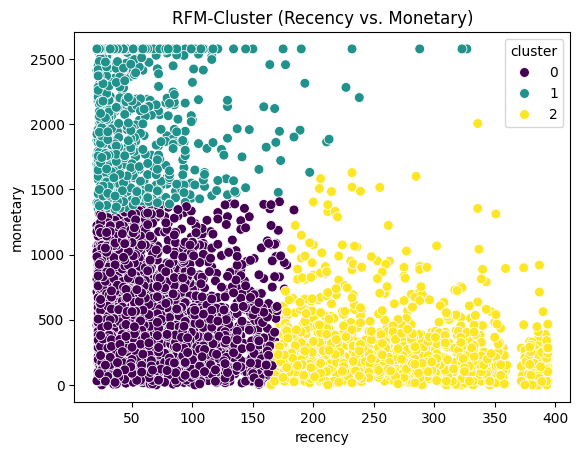

In [39]:
import seaborn as sns

sns.scatterplot(
    data=rfm,
    x='recency',
    y='monetary',
    hue='cluster',
    palette='viridis',
    s=50
)
plt.title('RFM-Cluster (Recency vs. Monetary)')
plt.show()


In [40]:
from sklearn.metrics import silhouette_score

# Silhouette-Score für die PCA-Daten
silhouette = silhouette_score(rfm_scaled, kmeans.labels_)
print(f"Silhouette-Score der PCA-Cluster: {silhouette:.2f}")


Silhouette-Score der PCA-Cluster: 0.57


In [41]:
# K-Means mit leicht geänderten Parametern
kmeans_new = KMeans(n_clusters=4, random_state=42, n_init=20)
labels_new = kmeans_new.fit_predict(rfm_scaled)

# Prüfen, wie viele Kunden gleich zugeordnet werden
same_labels = sum(kmeans.labels_ == labels_new)
stability = same_labels / len(kmeans.labels_)
print(f"Stabilität der Cluster-Zuordnung: {stability:.2%}")


Stabilität der Cluster-Zuordnung: 76.17%


C:\Users\phili\AppData\Local\Temp\ipykernel_21580\1792402527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='cluster', y=col, palette='viridis')


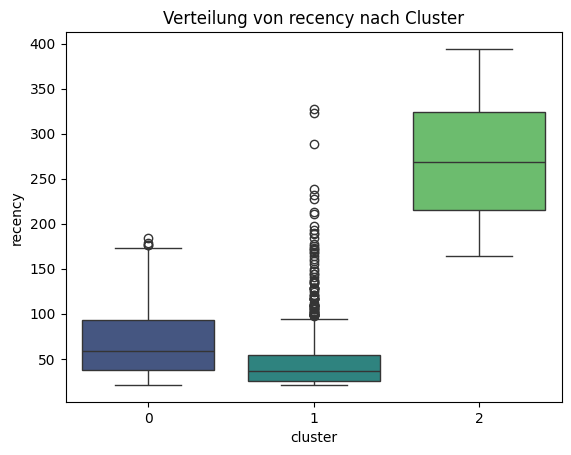

C:\Users\phili\AppData\Local\Temp\ipykernel_21580\1792402527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='cluster', y=col, palette='viridis')


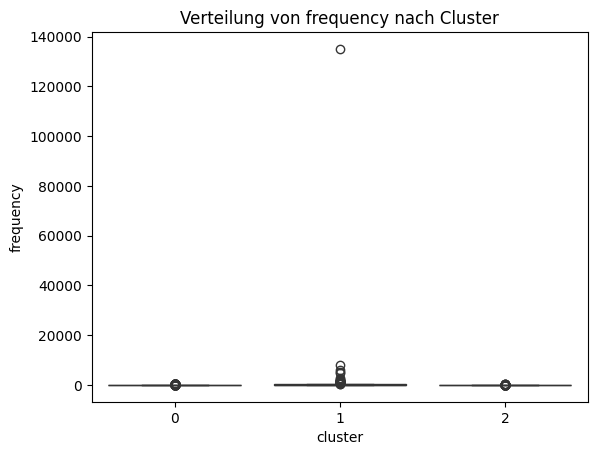

C:\Users\phili\AppData\Local\Temp\ipykernel_21580\1792402527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='cluster', y=col, palette='viridis')


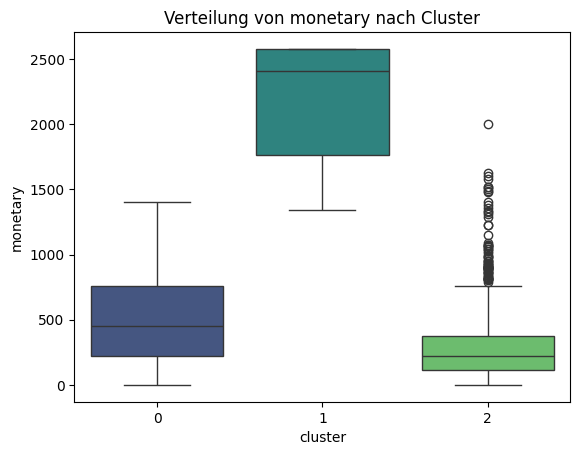

In [42]:
import seaborn as sns

# Boxplots für jeden RFM-Wert nach Cluster
for col in ['recency', 'frequency', 'monetary']:
    sns.boxplot(data=rfm, x='cluster', y=col, palette='viridis')
    plt.title(f'Verteilung von {col} nach Cluster')
    plt.show()


In [43]:
rfm["monetary"] = round(rfm["monetary"], 2)

In [44]:
rfm.to_csv('../data/processed/rfm_customer_segments.csv', index=False, decimal=',', sep=';')